<a href="https://colab.research.google.com/github/Ansi4Ansi/Google_colab/blob/main/ML_B2C_2024_Q2_%7C_HW09_ML_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #07: Unsupervised

**Оформление ДЗ**:

- Выполненное ДЗ сохраните в файл ``ml_b2c2024q2_<Surname>_<Name>_HW#.ipynb``
  
  (пример ``ml_b2c2024q2__Dral_Alexey_HW01.ipynb``)
- Зарегистрироваться и залогиниться в сервисе [Everest](https://everest.distcomp.org/)
- Перейти на страницу приложения: [BDT-grader-ML-B2C](https://everest.distcomp.org/apps/BigDataTeam/BDT-grader-ML-B2C)
- Выбрать вкладку Submit Job (если отображается иная).
- Выбрать в качестве “Task” значение: ``HW09:unsupervised`` (кодовое название для преподвателей: ``ml.unsupervised``)
- Загрузить в качестве “Task solution” файл с решением
- В качестве Access Token указать тот, который был выслан по почте или в телеграм от аккаунта @bdt_manager

**Дополнительные ссылки**
- Настройка локального окружения: https://github.com/big-data-team/ml-course
- Датасеты UCI: https://archive.ics.uci.edu/

**Вопросы**:
- Свои вопросы присылайте в Телеграм.

**Фидбек**:
- Пожалуйста, оставьте свой отзыв после выполнения домашнего задания по сссылке:

    https://forms.gle/Pny6dhdmhZZRNNQs5

### Вопросы на понимание

1. Можно ли использовать категориальные признаки для алгоритма K-Means? Если можно, то как? Если нет, то почему?
2. В чем разница между K-Means и K-Medoids?
3. Кто лучше справится с данными с шумом: K-Means или DBSCAN?
4. При каком объеме выборки становится невозможно найти глобальный оптимальный алгоритмов кластеризации? Приведите расчеты / оценки.
5. Какую величину выражают собственные значения ковариационной матрицы X.T?
6. Что такое Proportion of Variance Explained?
7. PCA и SVD это одно и тоже или разные вещи?
8. Какая оптимизационная задача решается в t-SNE?
9. Какие алгоритмы из PCA, t-SNE являются детерминированными, а какие нет.

<ваши ответы - здесь>

## Полезные import'ы

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import numpy as np
import pandas as pd
import sklearn
import PIL

from matplotlib import pyplot as plt
from sklearn.decomposition  import PCA
from sklearn.datasets import load_digits
from sklearn import datasets

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC


%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [2]:
print(sklearn.__version__)

1.2.2


# 1. Data Compression (30 %)

PCA can also be used for data compression. We are going to experiment with amount of principal components necessary to recover original image with high quality.

In [3]:
digits = load_digits()

In [4]:
X = digits.data
Y = digits.target

In [5]:
X.shape

(1797, 64)

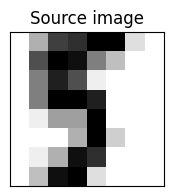

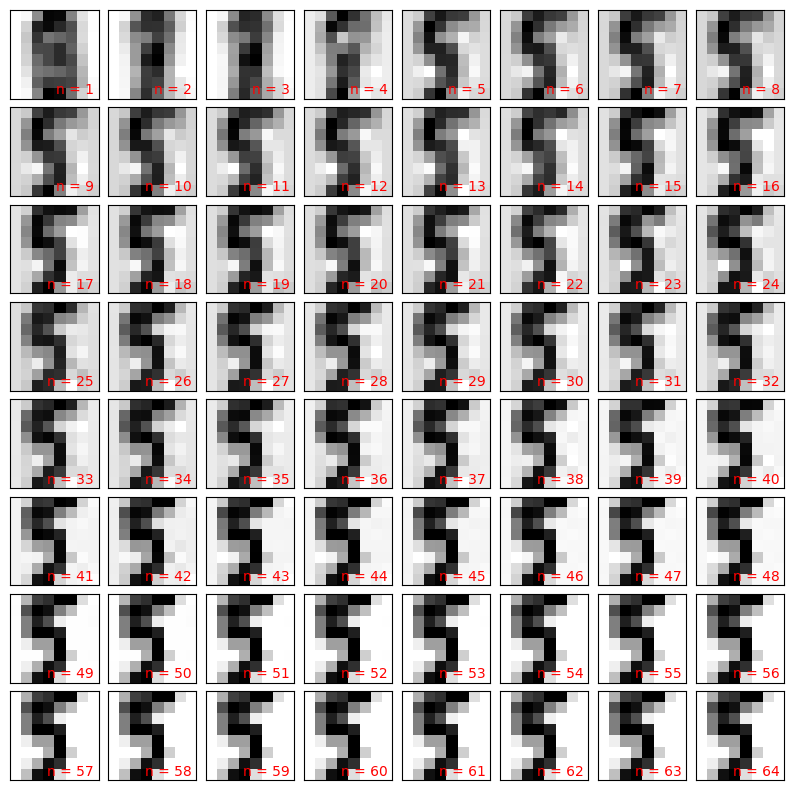

In [6]:
target_image_id = 15

plt.figure(figsize=(4,2))
plt.imshow(X[target_image_id].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for index, ax in enumerate(axes.flat):
    n_components = index + 1
    # Task: train PCA transformer with n_components and get reduced
    # image with id `target_image_id` plotted in high-dimensional
    # feature space
    # hint: take special care about shape of observations
  
    pca_model = PCA(n_components = n_components)
    X_recovered = pca_model.fit_transform(X)
    
    recovered_image = pca_model.inverse_transform(X_recovered)[target_image_id]

    ax.imshow(recovered_image.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(n_components), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

21


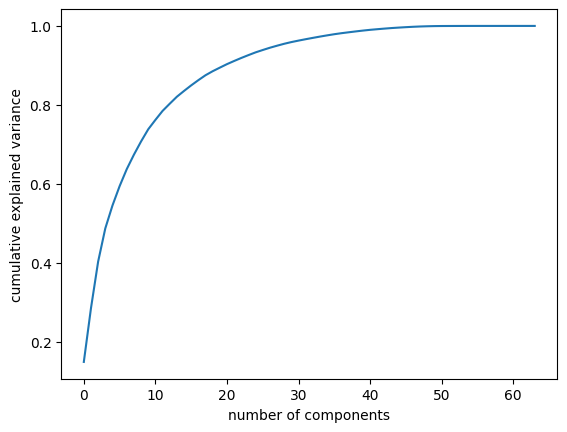

In [11]:
val = np.cumsum(pca_model.explained_variance_ratio_)
plt.plot(val)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
x_ind = np.nonzero(val>=0.9)
print(min(x_ind[0]+1))


### How many PCA components do you need to decompress image with quite a good quality?

In [ ]:
Допустим что quite good - 80%, количество компонент - 12

### How many components do you need to explain 90% of variance?

In [12]:
# train PCA transformer and get the amount of components from the transformer

pca_pve90_n_components = 21
print(f"We need {pca_pve90_n_components} components to explain 90% of variance")

We need 21 components to explain 90% of variance


### Plot Total explained variance to support your statement

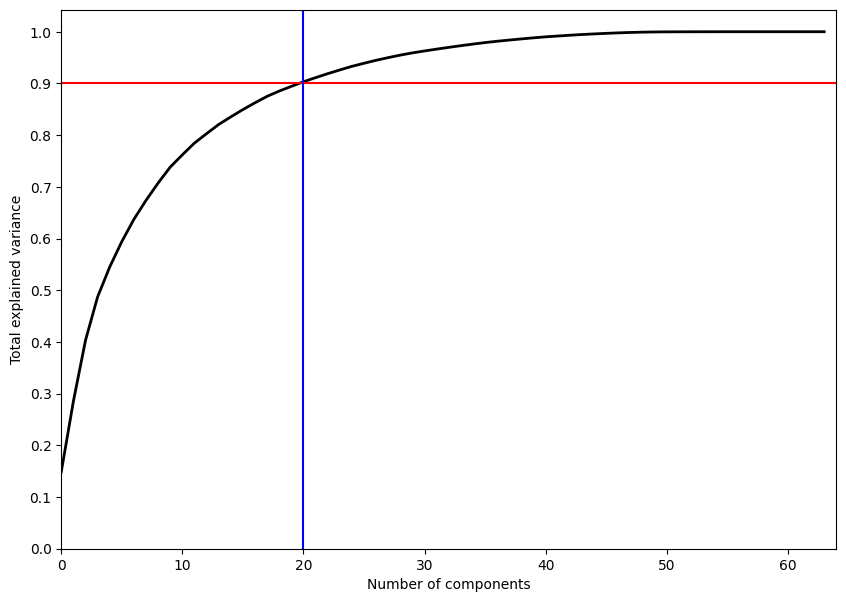

In [7]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))

pve = np.cumsum(pca.explained_variance_ratio_)

x_ind = np.nonzero(pve>=0.9)
x_90 = min(x_ind[0])
plt.plot(pve, color='black', lw=2)

# plot horizontal line for PVE 90%, set "red" color
plt.axhline(y=0.9, color='red', linestyle='-')
# plot vertical line for chosen pca_pve90_n_components, set "blue" color
plt.axvline(x=x_90, color='blue', linestyle='-')


plt.xlim(0, X.shape[1])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.show()

# 2. Labeled Faces in the Wild (LFW) (30%)

### Preprocessing

In [8]:
print(PIL.__version__)

9.5.0


In [9]:
%%time

lfw_people = datasets.fetch_lfw_people(
    min_faces_per_person=50,
    resize=0.4,
)

CPU times: user 9.26 s, sys: 3.41 s, total: 12.7 s
Wall time: 14.9 s


In [10]:
print(
    f'{lfw_people.data.shape[0]} objects, '
    + f'{lfw_people.data.shape[1]} features, '
    + f'{len(lfw_people.target_names)} classes'
)

1560 objects, 1850 features, 12 classes


In [11]:
# Show label distribution
for person_index, name in enumerate(lfw_people.target_names):
    print(f"{name:20}: {(lfw_people.target == person_index).sum():3} photos.")

Ariel Sharon        :  77 photos.
Colin Powell        : 236 photos.
Donald Rumsfeld     : 121 photos.
George W Bush       : 530 photos.
Gerhard Schroeder   : 109 photos.
Hugo Chavez         :  71 photos.
Jacques Chirac      :  52 photos.
Jean Chretien       :  55 photos.
John Ashcroft       :  53 photos.
Junichiro Koizumi   :  60 photos.
Serena Williams     :  52 photos.
Tony Blair          : 144 photos.


In [ ]:
fig = plt.figure(figsize=(8, 6))

for subplot_index in range(15):
    ax = fig.add_subplot(3, 5, subplot_index + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[subplot_index], cmap='bone')

In [ ]:
# split dataset into train and test in ratio 75:25
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

In [14]:
# Train PCA on "train" dataset with 100 components
pca_model = PCA(n_components = 100)
X_transformed = pca_model.fit_transform(X_train)

In [15]:
# Print how many PVE explained by all 100 n_components
pve = np.cumsum(pca_model.explained_variance_ratio_)
#print(pve)
print(pca_model.explained_variance_ratio_)

[0.24630888 0.12906496 0.06825894 0.05522026 0.04419895 0.02615946
 0.02139312 0.01893616 0.01757942 0.01644649 0.01397987 0.01346491
 0.01102738 0.01013302 0.00982701 0.00890282 0.00837853 0.00799455
 0.00745421 0.00712101 0.00652432 0.00638444 0.00545974 0.0051393
 0.00497797 0.00485324 0.00475719 0.00465094 0.00437103 0.00396679
 0.00382407 0.00355809 0.00347919 0.00334945 0.00326332 0.00313384
 0.00304263 0.00298829 0.00288852 0.00271481 0.00265394 0.00257666
 0.00255241 0.00248065 0.00243168 0.00238784 0.0022815  0.0022549
 0.00220086 0.00215477 0.00214384 0.00208803 0.00202347 0.00196625
 0.00191306 0.00190156 0.00182991 0.00181129 0.00174759 0.00166935
 0.00163711 0.00162022 0.00160011 0.00155844 0.00153709 0.00148167
 0.00145354 0.00143675 0.00141692 0.00140463 0.00137926 0.00133338
 0.00131827 0.00128654 0.00126807 0.0012528  0.00122759 0.00117399
 0.00115895 0.00113989 0.00111893 0.00110451 0.00110126 0.00107979
 0.00106704 0.00104594 0.00104202 0.00102831 0.00101698 0.000987

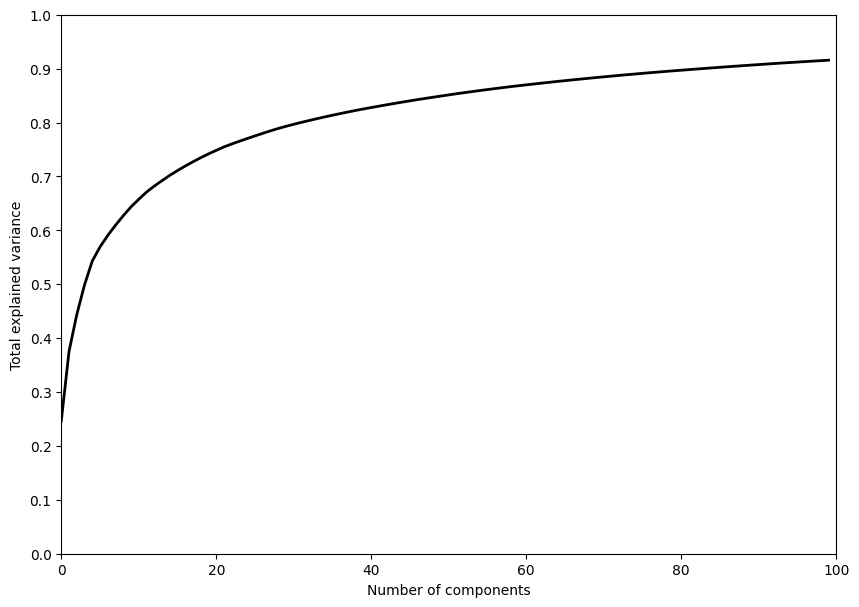

In [16]:
# Plot "Total explained variance" over n_components in range [0,100]
plt.figure(figsize=(10,7))
plt.plot(pve, color='black', lw=2)
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.show()

<Figure size 1600x600 with 0 Axes>

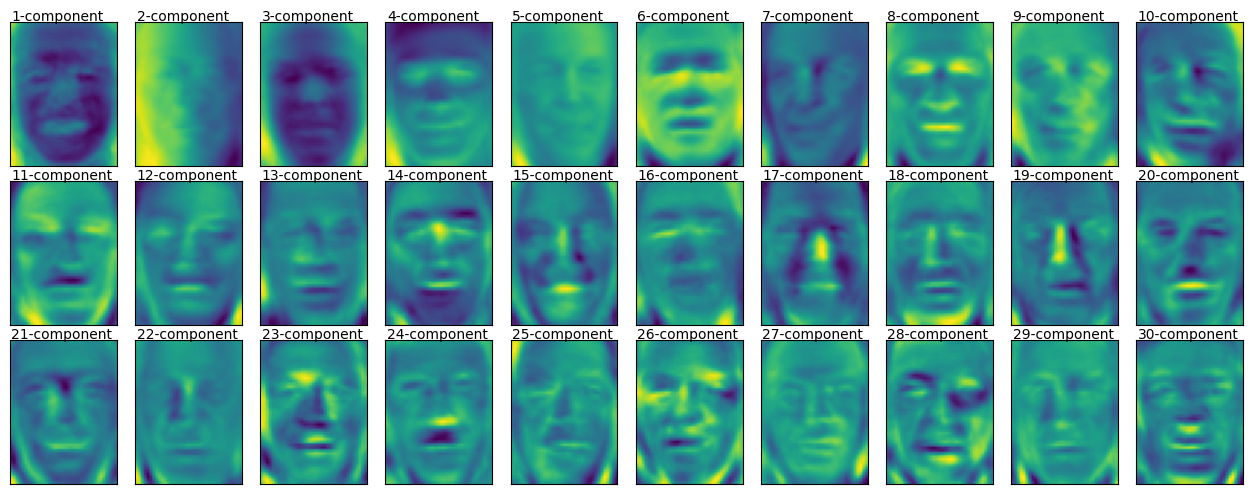

In [27]:
# Plot the first 30 Principal Components in the original feature space
# note: use grid 3 (rows) x 10 (columns)
# note: consider face shape 50x37
fig = plt.figure(figsize=(16, 6))
num_rows = 3
num_columns = 10
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for index, ax in enumerate(axes.flat):
    n_components = index + 1

    #ax.imshow(pca_model.components_[index].reshape(50 ,37), interpolation='nearest')
    ax.imshow(pca_model.components_[index].reshape(50 ,37))
    ax.text(0, -1, str(index + 1) + '-component')
    
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### What can you say about principle components? Does any of the principal components help to find feature dimension such as "nose", "lightning" or something else?

In [ ]:
# your answer

### Make some fun

In [23]:
# What is the average face in the "wild"?
X_train.shape

(1170, 1850)

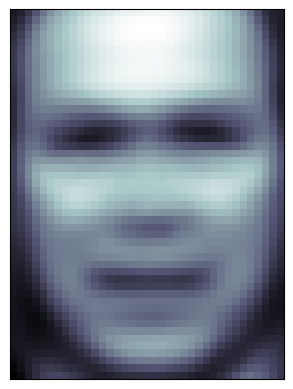

In [24]:
# Average all features with np.mean
plt.imshow(X_train.mean(axis=0).reshape(50, 37), cmap='bone')
plt.xticks([])
plt.yticks([]);

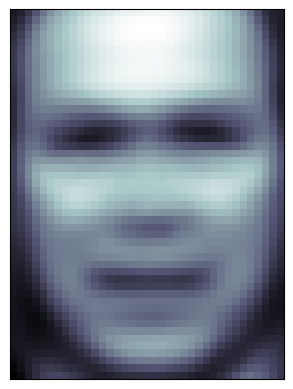

In [32]:
# Occasionally PCA does it for you already
plt.imshow(pca_model.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([]);

# 3. Pipeline optimization (40%)

In [ ]:
# Our goal is to speed-up calculations without loosing much of a quality with the
# help of dimensionality reduction algorithm

In [28]:
%%time

# Train LinearSVC on X_train, y_train with cv=5, set number of iteration to 10^4
svc_model = LinearSVC(random_state = 42, max_iter=1000)
cv_score = cross_val_score(svc_model, X_train, y_train, cv=5)
print(f"{cv_score.mean():.3f}, {cv_score.std():.3f}")

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.768, 0.035
CPU times: user 1min 38s, sys: 923 ms, total: 1min 39s
Wall time: 1min 38s


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [47]:
%%time

# you should see warnings "Liblinear failed to converge, increase the number of iterations"
# instead of doing this, let us add scaling to the pipeline, it helps optimization algorithms
svc_model = LinearSVC(random_state = 42, max_iter=1000, verbose = 1)
scl = StandardScaler()
pipeline = Pipeline(steps = [
    ('scl', scl),
    ('svc', svc_model)
])
cv_score = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"{cv_score.mean():.3f}, {cv_score.std():.3f}")

[LibLinear]....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -4.982989
nSV = 138
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -16.511768
nSV = 235
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -11.529464
nSV = 197
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -30.119931
nSV = 305
....................................................................................................
optimization fini

KeyboardInterrupt: 

In [30]:
# now you should be able to get better quality and to get rid of the warning
# to save time necessary to train the model
# copy time from the previous cell and cast to seconds
wall_time_in_seconds = 92
original_SVM_quality = cv_score.mean()

In [31]:
%%time

# our goal is to speed-up calculations by 100x without significant decrease in quality (let's say 1-2%)
# I heard that PCA might be of a great help
# add the first step (PCA with n_components = 10) to our pipeline:
pca = PCA(n_components = 10)
pipeline = Pipeline(steps = [
    ('pca', pca),
    ('minmax', minmax),
    ('svc', svc_model)
])
cv_score = cv_score = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"{cv_score.mean():.3f}, {cv_score.std():.3f}")

0.409, 0.004
CPU times: user 2.13 s, sys: 1.63 s, total: 3.76 s
Wall time: 983 ms


In [34]:
# Wow, do you see how fast is it?
# Let us try to find the appropriate amount of components
# with the help of GridSearchCV
pipeline = Pipeline(steps = [
    ('pca', pca),
    ('minmax', minmax),
    ('svc', svc_model)
])

param_grid = {
    'pca__n_components': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500],
}

grid_search = GridSearchCV(
    pipeline, param_grid, cv=5,
    return_train_score=False
)

In [35]:
%%time

# Let's grid_search do all the magic for us:
grid_search.fit(X_train, y_train)
print(f"Best parameter (CV score={grid_search.best_score_:0.3f}): {grid_search.best_params_}")

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameter (CV score=0.782): {'pca__n_components': 80}
CPU times: user 3min 22s, sys: 1min 8s, total: 4min 31s
Wall time: 2min 23s


### Analyse and visualize results

In [36]:
# show CV-results
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.183564,0.014091,0.003780,0.000183,10,{'pca__n_components': 10},0.410256,0.414530,0.410256,0.401709,0.405983,0.408547,0.004358,14
1,0.518154,0.123854,0.005050,0.002213,20,{'pca__n_components': 20},0.585470,0.508547,0.559829,0.529915,0.529915,0.542735,0.026893,13
2,0.395726,0.051631,0.003855,0.000047,30,{'pca__n_components': 30},0.683761,0.653846,0.653846,0.713675,0.675214,0.676068,0.022189,11
3,0.499964,0.060568,0.004002,0.000114,40,{'pca__n_components': 40},0.743590,0.700855,0.717949,0.735043,0.705128,0.720513,0.016573,8
4,0.865960,0.396809,0.004296,0.000236,50,{'pca__n_components': 50},0.760684,0.760684,0.739316,0.705128,0.743590,0.741880,0.020334,7
5,0.992440,0.336571,0.004421,0.000097,60,{'pca__n_components': 60},0.760684,0.764957,0.764957,0.717949,0.735043,0.748718,0.018997,5
6,1.239541,0.312315,0.005379,0.001706,70,{'pca__n_components': 70},0.769231,0.773504,0.782051,0.743590,0.752137,0.764103,0.014148,4
7,0.932793,0.140765,0.004734,0.000135,80,{'pca__n_components': 80},0.803419,0.777778,0.786325,0.760684,0.782051,0.782051,0.013782,1
8,0.883201,0.058691,0.004792,0.000084,90,{'pca__n_components': 90},0.769231,0.769231,0.807692,0.756410,0.786325,0.777778,0.017723,2
9,1.056417,0.122150,0.006247,0.001333,100,{'pca__n_components': 100},0.807692,0.756410,0.760684,0.769231,0.782051,0.775214,0.018450,3


#### Visualize the best quality pipeline

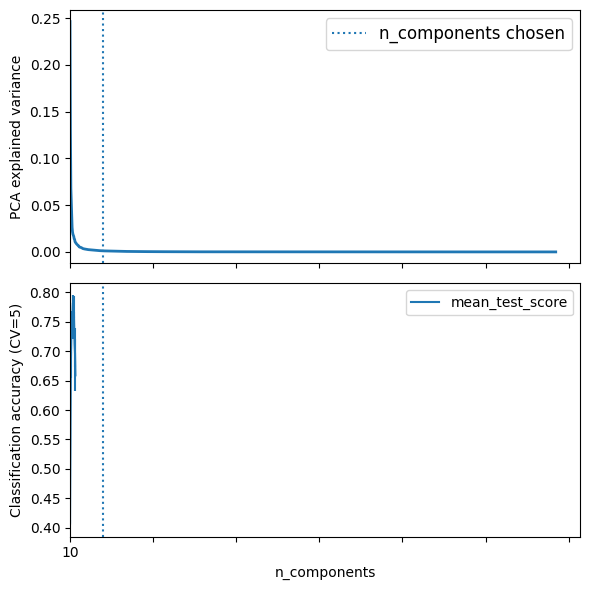

In [37]:
pca = PCA().fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax0.axvline(
    grid_search.best_estimator_.named_steps['pca'].n_components,
    linestyle=':', label='n_components chosen'
)
ax0.legend(prop=dict(size=12))

cv_results_df.plot(
    x='param_pca__n_components', y='mean_test_score', yerr='std_test_score',
    legend=True, ax=ax1
)
ax1.axvline(
    grid_search.best_estimator_.named_steps['pca'].n_components,
    linestyle=':', label='n_components chosen'
)
ax1.set_ylabel('Classification accuracy (CV=5)')
ax1.set_xlabel('n_components')
ax1.set_xlim(left=0)

plt.tight_layout();

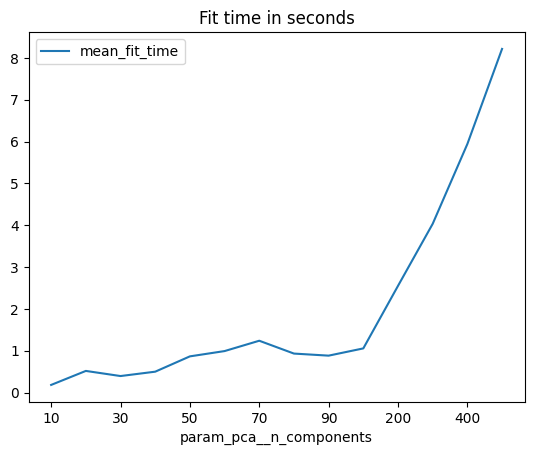

In [38]:
# plot "time" spent to fit the models
cv_results_df.plot(
    x='param_pca__n_components', y='mean_fit_time',
    legend=True
)
plt.title("Fit time in seconds");

In [ ]:
# Compared to the original `wall_time_in_seconds` what is speed-up factor?
# Compared to the original `original_SVM_quality` what is the quality of best-pipeline?
# Which model are you going to use in production?
# How much of the variance explained was enough to achieve such a good quality?

In [ ]:
<your answer>

### Validate quality of the best model on hold-out dataset

In [39]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

Accuracy: 0.797436
                   precision    recall  f1-score   support

     Ariel Sharon       0.85      0.69      0.76        16
     Colin Powell       0.82      0.91      0.86        66
  Donald Rumsfeld       0.54      0.48      0.51        27
    George W Bush       0.85      0.87      0.86       140
Gerhard Schroeder       0.58      0.62      0.60        24
      Hugo Chavez       0.82      0.82      0.82        17
   Jacques Chirac       0.71      0.50      0.59        10
    Jean Chretien       0.62      0.71      0.67        14
    John Ashcroft       0.93      0.81      0.87        16
Junichiro Koizumi       0.82      0.82      0.82        11
  Serena Williams       0.89      0.89      0.89         9
       Tony Blair       0.84      0.78      0.81        40

         accuracy                           0.80       390
        macro avg       0.77      0.74      0.75       390
     weighted avg       0.80      0.80      0.80       390



In [41]:
M = confusion_matrix(y_test, y_pred)
# normalize confusion matrix over y_test rows
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

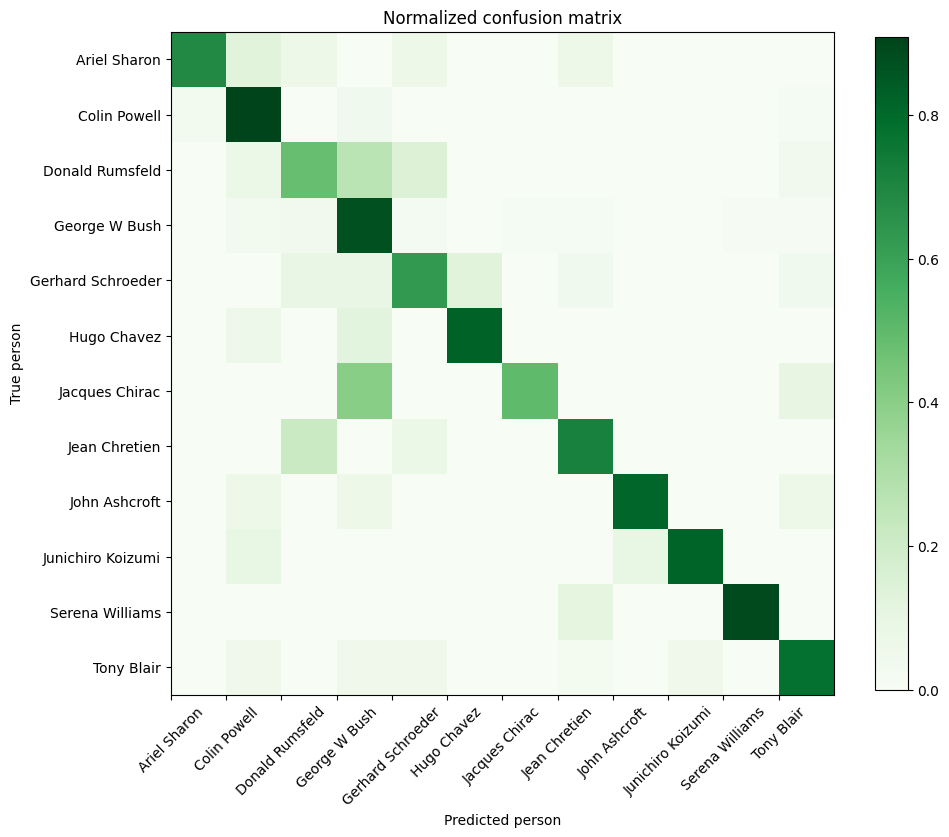

In [42]:
plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, cmap='Greens')
plt.colorbar(im, shrink=0.7)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.xlabel('Predicted person')
plt.ylabel('True person')
plt.title('Normalized confusion matrix');

### Q&A:
1. Which person was easy to classify?
2. Which person was difficult to classify?
3. What is the most common error? Which person was frequenlty misclassified by another one?

In [ ]:
# your answer

## Bonus

According to the article "Pinto, Nicolas, James J. DiCarlo, and David D. Cox. "How far can you get with a modern face recognition test set using only simple features?." 2009 IEEE Conference on Computer Vision and Pattern Recognition. IEEE, 2009." http://www.coxlab.org/pdfs/pinto-dicarlo-cox-cvpr-2009-mkl.pdf
    
they were able to get the quality 79.35%. Can you do better?

In [ ]:
<your code and comments>

## Useful links
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)
- [LIBLinear home page](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)
- [LIBLinear FAQ](https://www.csie.ntu.edu.tw/~cjlin/liblinear/FAQ.html)

Надеемся, было интересно и полезно.

Пожалуйста, оставьте обратную связь по этому домашнему заданию: https://forms.gle/Pny6dhdmhZZRNNQs5.